# Neural networks with PyTorch

.

In [3]:
# Import necessary packages

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np # import numpy 
import torch 



import matplotlib.pyplot as plt # used for plotting in python

In [4]:
import helper1
# a warapper built for visualisation purposes


Now we're going to build a larger network that can solve a (formerly) difficult problem, identifying text in an image. Here we'll use the MNIST dataset which consists of greyscale handwritten digits. Each image is 28x28 pixels, you can see a sample below

<img src='TD_images/mnist.png'>


Our goal is to build a neural network that can take one of these images and predict the digit in the image.

First up, we need to get our dataset
This is provided through the `torchvision` package. 

The code below will download the MNIST dataset, then create training and test datasets for us.

# Load the data, 
## normalize it
## create training data set and test data set.

In [5]:
from torchvision import datasets,transforms


In [6]:
### Data loading 

from torchvision import datasets, transforms 

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5,), (0.5,)),

                               ])
# Download and load the training data
trainset = datasets.MNIST('~/.pytorch/MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=False) # batch size is 64 for training

7.6%

100.0%


Extracting C:\Users\Utilisateur/.pytorch/MNIST_data/MNIST\raw\train-images-idx3-ubyte.gz to C:\Users\Utilisateur/.pytorch/MNIST_data/MNIST\raw



100.0%


Extracting C:\Users\Utilisateur/.pytorch/MNIST_data/MNIST\raw\train-labels-idx1-ubyte.gz to C:\Users\Utilisateur/.pytorch/MNIST_data/MNIST\raw



100.0%


Extracting C:\Users\Utilisateur/.pytorch/MNIST_data/MNIST\raw\t10k-images-idx3-ubyte.gz to C:\Users\Utilisateur/.pytorch/MNIST_data/MNIST\raw



100.0%

Extracting C:\Users\Utilisateur/.pytorch/MNIST_data/MNIST\raw\t10k-labels-idx1-ubyte.gz to C:\Users\Utilisateur/.pytorch/MNIST_data/MNIST\raw



We have the training data loaded into `trainloader` and we make that an iterator with `iter(trainloader)`. Later, we'll use this to loop through the dataset for training, like

```python
for image, label in trainloader:
    ## do things with images and labels
```

The `trainloader` **is created with a batch size of 64**,
and `shuffle=True`. 
**The batch size is the number of images we get in one iteration from the data loader**
and pass through our network, often called a *batch*.
**And `shuffle=True` tells it to shuffle the dataset every time we start going through the data loader again**.

**the first batch : We can see below that `images` is just a tensor with size `(64, 1, 28, 28)`. So, 64 images per batch, 1 color channel, and 28x28 images.**

In [18]:
dataiter = iter(trainloader)
images, labels = dataiter.next()
print(type(images))
print(images.shape)
print(labels.shape)


<class 'torch.Tensor'>
torch.Size([64, 1, 28, 28])
torch.Size([64])
<class 'torch.Tensor'>
torch.Size([64, 1, 28, 28])
torch.Size([64])
<class 'torch.Tensor'>
torch.Size([64, 1, 28, 28])
torch.Size([64])
<class 'torch.Tensor'>
torch.Size([64, 1, 28, 28])
torch.Size([64])
<class 'torch.Tensor'>
torch.Size([64, 1, 28, 28])
torch.Size([64])
<class 'torch.Tensor'>
torch.Size([64, 1, 28, 28])
torch.Size([64])
<class 'torch.Tensor'>
torch.Size([64, 1, 28, 28])
torch.Size([64])
<class 'torch.Tensor'>
torch.Size([64, 1, 28, 28])
torch.Size([64])
<class 'torch.Tensor'>
torch.Size([64, 1, 28, 28])
torch.Size([64])
<class 'torch.Tensor'>
torch.Size([64, 1, 28, 28])
torch.Size([64])
<class 'torch.Tensor'>
torch.Size([64, 1, 28, 28])
torch.Size([64])
<class 'torch.Tensor'>
torch.Size([64, 1, 28, 28])
torch.Size([64])
<class 'torch.Tensor'>
torch.Size([64, 1, 28, 28])
torch.Size([64])
<class 'torch.Tensor'>
torch.Size([64, 1, 28, 28])
torch.Size([64])
<class 'torch.Tensor'>
torch.Size([64, 1, 28, 28

This is what one of the images looks like. 

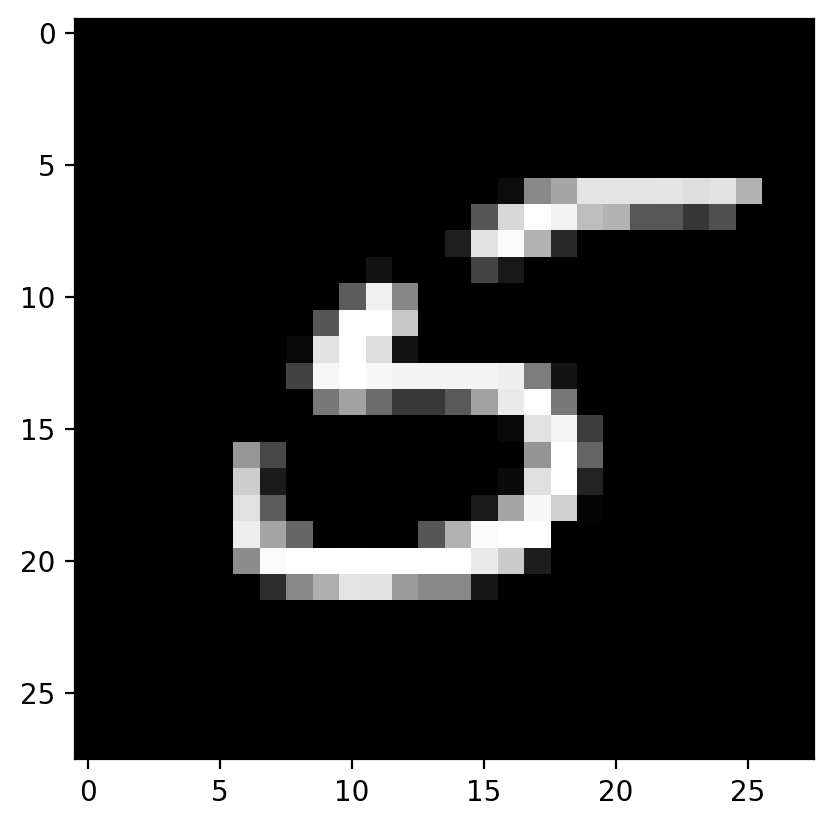

In [16]:
plt.imshow(images[0].numpy().squeeze(), cmap='Greys_r');

## First, build NN operation using matrix operations

First, build --> simple network for this dataset using weight matrices and matrix multiplications. 


Then, we'll see how to do it using PyTorch's `nn` module 

The networks you've seen so far are called *fully-connected* or *dense* networks.
Each unit in one layer is connected to each unit in the next layer.

In fully-connected networks, the input to each layer must be a one-dimensional vector (which can be stacked into a 2D tensor as a batch of multiple examples). 

However, our images are 28x28 2D tensors, so we need to convert them into 1D vectors. 

Thinking about sizes, we need to convert the batch of images with shape `(64, 1, 28, 28)` to a have a shape of `(64, 784)`, 784 is 28 times 28. This is typically called *flattening*, we flattened the 2D images into 1D vectors.

Previously you built a network with one output unit. Here we need 10 output units, one for each digit. 
(multi class classification)


We want our network to predict the digit shown in an image, so what we'll do is calculate probabilities that the image is of any one digit or class. 
This ends up being a discrete probability distribution over the classes (digits) that tells us the most likely class for the image. 

That means we need 10 output units for the 10 classes (digits). We'll see how to convert the network output into a probability distribution next.

> **Objective: Exercise** Flatten the batch of images `images`. Then build a multi-layer network with 784 input units, 256 hidden units, and 10 output units using random tensors for the weights and biases. For now, use a sigmoid activation for the hidden layer. Leave the output layer without an activation, we'll add one that gives us a probability distribution next.

In [20]:
## Solution
def activation(x):
    return 1/(1+torch.exp(-x))

# Flatten the input images (Applatir les images, les faire passer de la forme (64, 1, 28, 28) à la forme (64, 784))
inputs = images.view(images.shape[0], -1)

# Create parameters (ici, les matrices de poids (wi) connectent les Unités d'entrée aux unités cachées)
w1 = torch.randn(784, 256)
b1 = torch.randn(256)

w2 = torch.randn(256, 10)
b2 = torch.randn(10)

# Forward pass (Propagation avant)
h = activation(torch.mm(inputs, w1) + b1)
out = torch.mm(h, w2) + b2



In [12]:
print(out)

tensor([[ 1.2831e+01,  1.1584e+01,  7.2315e-01, -1.6659e+01, -2.7786e-01,
          5.7024e+00, -1.2700e+01,  4.5597e+00,  9.5456e+00,  1.2598e-01],
        [ 1.0512e+01,  1.4256e+01,  1.7724e+00, -2.1576e+01, -9.0652e+00,
          8.1008e+00, -1.5007e+01, -4.5336e+00,  5.0584e+00, -2.8892e+00],
        [ 6.4391e+00,  1.1606e+01,  9.5722e+00, -1.3496e+01, -1.8005e+00,
          4.3769e+00, -1.1309e+01, -2.5890e+00,  1.1107e+01,  5.1666e-01],
        [ 5.2660e+00,  1.0724e+01,  5.0169e+00, -1.9866e+01, -3.3213e-01,
          7.1100e+00, -1.5866e+01, -2.8787e+00,  8.6812e+00,  3.1081e+00],
        [ 1.2159e+01,  1.6649e+01, -2.3420e+00, -1.4213e+01,  2.3385e+00,
          4.4009e+00, -7.1705e+00, -7.3128e+00,  1.4156e+01,  7.3720e+00],
        [ 3.1525e+00,  1.6154e+01, -6.1663e+00, -2.2022e+01, -4.4083e+00,
          5.1736e+00, -1.6867e+01, -3.9347e+00,  9.5981e+00, -5.7914e+00],
        [ 9.6147e+00,  6.0836e+00,  5.3372e+00, -1.6413e+01, -2.9426e-01,
          1.3333e+00, -1.7865e+0

Now we have 10 outputs for our network. We want to pass in an image to our network and get out a probability distribution over the classes that tells us the likely class(es) the image belongs to. Something that looks like this:
<img src='TD_images/image_distribution.png' width=500px>

Here we see that the probability for each class is roughly the same. This is representing an untrained network, it hasn't seen any data yet so it just returns a uniform distribution with equal probabilities for each class.

To calculate this probability distribution, we often use the [**softmax** function](https://en.wikipedia.org/wiki/Softmax_function). Mathematically this looks like

$$
\Large \sigma(x_i) = \cfrac{e^{x_i}}{\sum_k^K{e^{x_k}}}
$$

What this does is squish each input $x_i$ between 0 and 1 and normalizes the values to give you a proper probability distribution where the probabilites sum up to one.

> **Exercise:** Implement a function `softmax` that performs the softmax calculation and returns probability distributions for each example in the batch. 

**Attention:  Shapes must be conserved during multiplications!!** 

If you have a tensor `a` with shape `(64, 10)` and a tensor `b` with shape `(64,)`,
doing `a/b` gives error because
PyTorch will try to do the division across the columns (called broadcasting)
but you'll get a size mismatch. 

**The way to think about this is for each of the 64 examples, you only want to divide by one value, the sum in the denominator.**

So you need `b` to have a shape of `(64, 1)`. 

This way PyTorch will divide the 10 values in each row of `a` by the one value in each row of `b`.

**Pay attention to how you take the sum as well.** 
You'll need to define the `dim` keyword in `torch.sum`. 
**Setting `dim=0` takes the sum across the rows while `dim=1` takes the sum across the columns**
.

In [13]:
## Solution
def softmax(x):
    return torch.exp(x)/torch.sum(torch.exp(x), dim=1).view(-1, 1) # view(-1,1) will give the reshaped matrix with 
                                                                   #1 column and default rows**

probabilities = softmax(out)

# Does it have the right shape? Should be (64, 10)
print(probabilities.shape)
# Does it sum to 1?
print(probabilities.sum(dim=1))

torch.Size([64, 10])
tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000])


## Building networks with PyTorch
## Using nn module 

PyTorch provides a module `nn` that makes building networks much simpler. 
Here we build the same one as above with 784 inputs, 
256 hidden units, 
10 output units 
and a softmax output.

In [22]:
from torch import nn

In [23]:
class Network(nn.Module):
    def __init__(self):
        super().__init__()
        
        # Inputs to hidden layer linear transformation
        self.hidden = nn.Linear(784, 256)
        # Output layer, 10 units - one for each digit
        self.output = nn.Linear(256, 10)
        
        # Define sigmoid activation and softmax output 
        self.sigmoid = nn.Sigmoid()
        self.softmax = nn.Softmax(dim=1)
        
    def forward(self, x):# this is where the data flows in the network, respecting 
                         #sequence of layers in forward method is very important.
        # Pass the input tensor through each of our operations
        x = self.hidden(x)
        x = self.sigmoid(x)
        x = self.output(x)
        x = self.softmax(x)
        
        return x

Let's go through this bit by bit.

```python
class Network(nn.Module):
```

Here we're inheriting from `nn.Module`. 
Combined with `super().__init__()` this creates a class that tracks the architecture and provides a lot of useful methods and attributes. 

**It is mandatory to inherit from `nn.Module` when you're creating a class for your network. The name of the class itself can be anything**.

```python
self.hidden = nn.Linear(784, 256)
```

This line creates a module for a **linear transformation**, $x\mathbf{W} + b$, with 784 inputs and 256 outputs and assigns it to `self.hidden`. T
**The module automatically creates the weight and bias tensors which we'll use in the `forward` method.** 

You can access the weight and bias tensors once the network (`net`) is created with `net.hidden.weight` and `net.hidden.bias`.

```python
self.output = nn.Linear(256, 10)
```

Similarly, this creates another **linear transformation** with 256 inputs and 10 outputs.

```python
self.sigmoid = nn.Sigmoid()
self.softmax = nn.Softmax(dim=1)
```

Here operations for the sigmoid activation and softmax output are defined. 
**Setting `dim=1` in `nn.Softmax(dim=1)` calculates softmax across the columns**.

```python
def forward(self, x):
```

PyTorch networks created with `nn.Module` **must** have a `forward` method defined. 
**It takes in a tensor `x` and passes it through the operations you defined in the `__init__` method.

```python
x = self.hidden(x)
x = self.sigmoid(x)
x = self.output(x)
x = self.softmax(x)
```

**Here the input tensor `x` is passed through each operation a reassigned to `x`**. 
We can see that the input tensor goes through the hidden layer, then a sigmoid function, then the output layer, and finally the softmax function. 

It doesn't matter what you name the variables here, as long as the inputs and outputs of the operations match the network architecture you want to build. 

The order in which you define things in the `__init__` method doesn't matter, but you'll need to sequence the operations correctly in the `forward` method.

Now we can create a `Network` object.

In [24]:
# Create the network and look at it's text representation
model = Network()
model

Network(
  (hidden): Linear(in_features=784, out_features=256, bias=True)
  (output): Linear(in_features=256, out_features=10, bias=True)
  (sigmoid): Sigmoid()
  (softmax): Softmax(dim=1)
)

You can define the network somewhat more concisely and clearly using the `torch.nn.functional` module. This is the most common way you'll see networks defined as many operations are simple element-wise functions. We normally import this module as `F`, `import torch.nn.functional as F`.

### Activation functions

Common activation functions: Tanh (hyperbolic tangent), and ReLU (rectified linear unit).

<img src="TD_images/activation.png" width=700px>

In practice, the ReLU function is used almost exclusively as the activation function for hidden layers.

### Build a Network!

<img src="TD_images/mlp_mnist.png" width=600px>

> **Exercise:** Create a network with 784 input units, a hidden layer with 128 units and a ReLU activation, then a hidden layer with 64 units and a ReLU activation, and finally an output layer with a softmax activation as shown above. You can use a ReLU activation with the `nn.ReLU` module or `F.relu` function.

Whene there are many layers 
**It's good practice to name your layers by their type of network**
, for instance 'fc' to represent a fully-connected layer. 
** use `fc1`, `fc2`, and `fc3` as your layer names**

In [26]:
## Solution
import torch.nn.functional as F

class Network(nn.Module):
    def __init__(self):
        super().__init__()
        
        # Define hidden layers with ReLU activation
        self.fc1 = nn.Linear(784, 128)
        self.fc2 = nn.Linear(128, 64)
        
        # Define output layer with softmax activation
        self.fc3 = nn.Linear(64, 10)
        
    def forward(self, x):
        # Pass input through hidden layers with ReLU activation
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        
        # Pass input through output layer with softmax activation
        x = F.softmax(self.fc3(x), dim=1)
        
        return x

model = Network()
model


Network(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=10, bias=True)
)

RuntimeError: shape '[28, 28]' is invalid for input of size 128

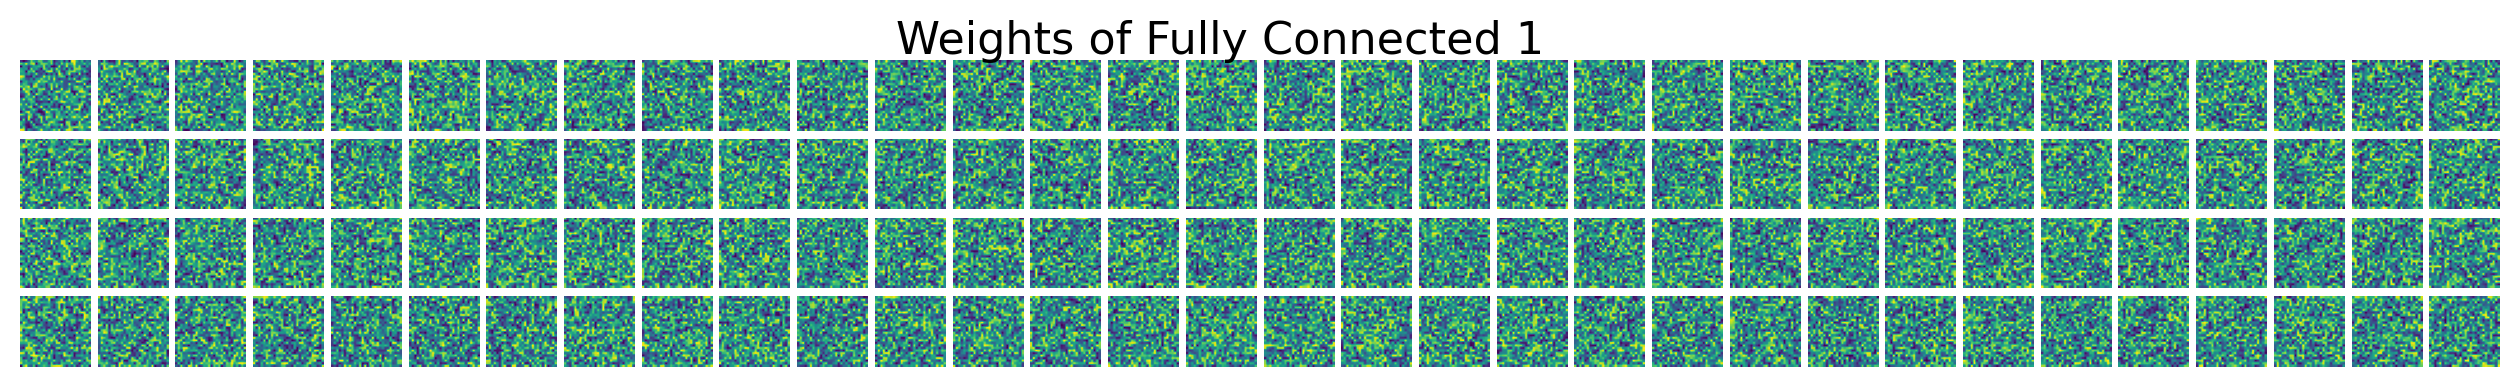

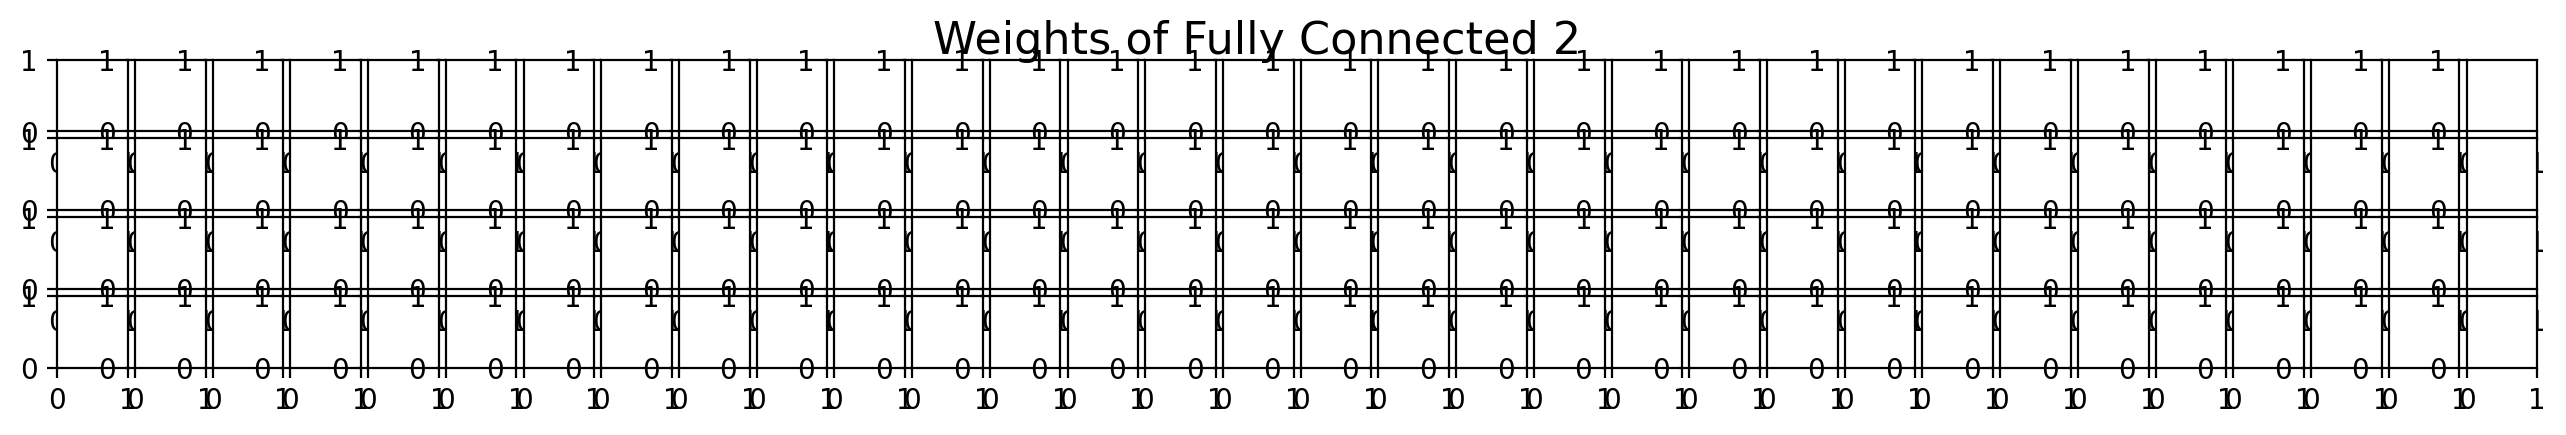

In [29]:
# visalize the weights
import matplotlib.pyplot as plt
import numpy as np

# Create an instance of your network
model = Network()

# Access the weight tensors of each layer
weights_fc1 = model.fc1.weight.data
weights_fc2 = model.fc2.weight.data
weights_fc3 = model.fc3.weight.data

# Function to plot the weights of a layer
def plot_weights(layer_weights, layer_name):
    fig, axes = plt.subplots(nrows=4, ncols=32, figsize=(16, 2))
    fig.suptitle(f'Weights of {layer_name}', fontsize=16)
    fig.subplots_adjust(wspace=0.1, hspace=0.1)
    for i, ax in enumerate(axes.flatten()):
        ax.imshow(layer_weights[i].view(28, 28).cpu().numpy(), cmap='viridis')
        ax.axis('off')

# Plot the weights of each layer
plot_weights(weights_fc1, 'Fully Connected 1')
plot_weights(weights_fc2, 'Fully Connected 2')
plot_weights(weights_fc3, 'Output Layer')

plt.show()


### Forward pass

Now that we have a network, let's see what happens when we pass in an image.

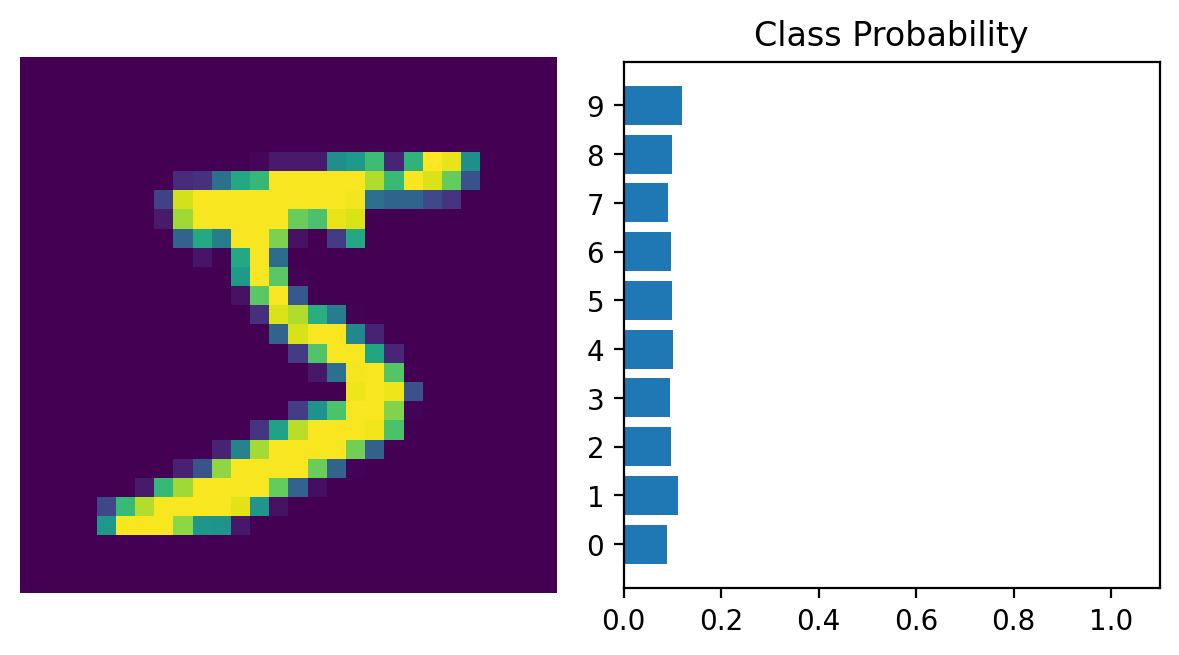

In [31]:
# Grab some data
dataiter = iter(trainloader)
images, labels = next(dataiter)  # Utilisez la fonction next() pour obtenir un batch de données

# Resize images into a 1D vector, new shape is (batch size, color channels, image pixels)
images = images.view(images.shape[0], -1)

# Forward pass through the network
img_idx = 0
ps = model.forward(images[img_idx].unsqueeze(0))  # Utilisez .unsqueeze(0) pour obtenir une dimension batch de 1

# Visualize the prediction
img = images[img_idx].view(1, 28, 28)
helper1.view_classify(img, ps)


As you can see above, our network has basically no idea what this digit is. It's because we haven't trained it yet, all the weights are random!

### Using `nn.Sequential` 

## Another way of Deep Neural networks

PyTorch provides a **convenient** way to build networks like this where a tensor is passed sequentially through operations, `nn.Sequential` ([documentation](https://pytorch.org/docs/master/nn.html#torch.nn.Sequential)).
**Using this to build the equivalent network**:
**I prefer this way of builiding NNs in Pytorch**

Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=10, bias=True)
  (5): Softmax(dim=1)
)


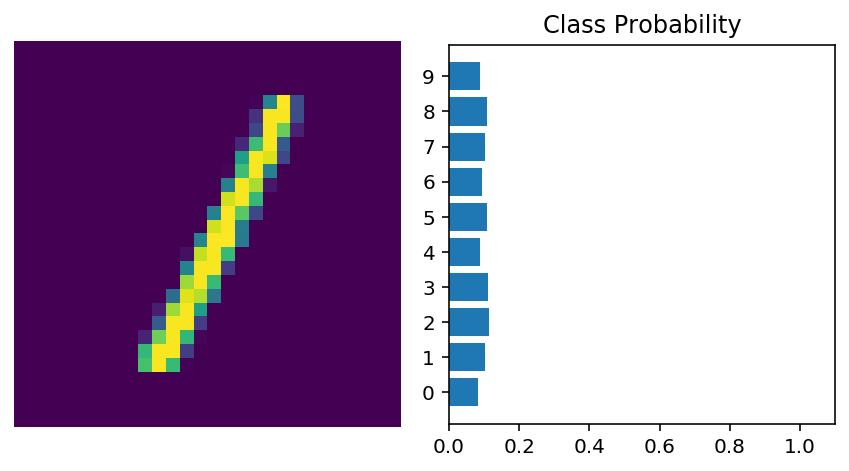

In [30]:
# Hyperparameters for our network
input_size = 784
hidden_sizes = [128, 64]
output_size = 10

# Build a feed-forward network
model = nn.Sequential(nn.Linear(input_size, hidden_sizes[0]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[0], hidden_sizes[1]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[1], output_size),
                      nn.Softmax(dim=1))
print(model)

# Forward pass through the network and display output
images, labels = next(iter(trainloader))
images.resize_(images.shape[0], 1, 784)

ps = model.forward(images[0,:])
helper1.view_classify(images[0].view(1, 28, 28), ps)

Now you can access layers either by integer or the name

In [33]:
print(model[0])
print(model.fc1)

Linear(in_features=784, out_features=128, bias=True)
Linear(in_features=784, out_features=128, bias=True)


In the next notebook, we'll see how we can train a neural network to accuractly predict the numbers appearing in the MNIST images.